# REGRESSION

The word "regression" originally comes from a famous series of experiments performed by the British Biologist Francis Galton and his student Karl Pearson. 

They plotted the heights of children against the average heights of their parents, and they noticed that the offspring tends to be less "exceptional" than their parents; while offspring heights were clearly correlated with their parents' heights, their deviations from the mean were less pronounced. They called this regression to the mean. 

Consider the data in par_off.csv, which contains a collection of parent-offspring heights from Pearson's data. The first column contains the parents' height and the second column the height of the offspring. 

1. Perform a linear regression and consider the mean heights of parents and offspring, their intercept and coefficient. Does this conform to Galton and Pearson's observations?

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

Mean Parent Height: 67.69
Mean Offspring Height: 68.68
Intercept: 33.89
Coefficient (Slope): 0.51


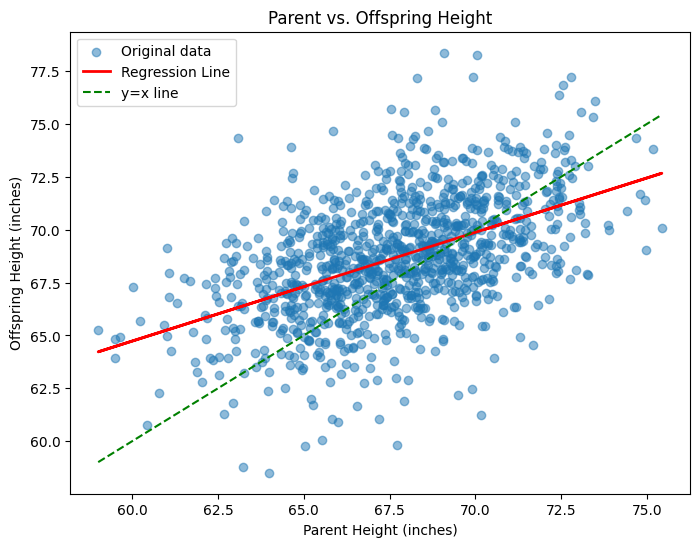

In [3]:
# Load the data
df = pd.read_csv('../data/par_off.csv', header=None, names=['parent_height', 'offspring_height'])

# Calculate mean heights
mean_parent_height = df['parent_height'].mean()
mean_offspring_height = df['offspring_height'].mean()

# Prepare data for scikit-learn
X = df[['parent_height']]
y = df['offspring_height']

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Get the intercept and coefficient
intercept = model.intercept_
coefficient = model.coef_[0]

print(f"Mean Parent Height: {mean_parent_height:.2f}")
print(f"Mean Offspring Height: {mean_offspring_height:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"Coefficient (Slope): {coefficient:.2f}")

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5, label='Original data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.plot([df['parent_height'].min(), df['parent_height'].max()], [df['parent_height'].min(), df['parent_height'].max()], 'g--', label='y=x line')
plt.title('Parent vs. Offspring Height')
plt.xlabel('Parent Height (inches)')
plt.ylabel('Offspring Height (inches)')
plt.legend()

The results conform to Galton and Pearson's observations about regression to the mean.

Here's why:

The key is the regression coefficient (slope), which is 0.51. A slope that is greater than 0 but less than 1 is the statistical signature of this phenomenon.

    What it means: A slope of 0.51 indicates that for every one-inch that the parents' average height differs from the mean parent height, the offspring's height is expected to differ from the mean offspring height by only about half an inch (0.51 inches) in the same direction.

    Regression in Action:

        If a parent is 4 inches taller than the average, their child is predicted to be only about 2 inches taller than the offspring average.

        Conversely, if a parent is 4 inches shorter than the average, their child is predicted to be only about 2 inches shorter than the offspring average.

This shows that the offspring's height tends to be less "exceptional" than the parent's height, moving closer—or "regressing"—toward the average height of their generation. This is precisely the effect that Galton and Pearson first documented.

2. Heritability


In [6]:
def generate_data(mean, var, hrd, n_each, n):
   """
   Generates simulated hereditary data for n individuals.

   This function models a trait (like height) as a combination of a 
   heritable genetic factor and a random, non-heritable factor.

   Args:
     mean (float): The average value of the trait for the population.
     var (float): The total variance of the trait in the population.
     hrd (float): The heritability of the trait (a value between 0 and 1).
                  This is the proportion of the total variance that is
                  due to genetic factors.
     n_each (int): The number of offspring to generate for each genetic value.
     n (int): The number of unique genetic factors (individuals) to generate.
   """

   # --- 1. Generate the shared genetic factor 'g' ---
   # This value represents the genetic predisposition for the trait.
   # It's drawn from a normal distribution with the population 'mean'.
   # The variance of this genetic component is a fraction of the total
   # variance, determined by the heritability ('hrd').
   # For example, if total variance is 100 and heritability is 0.8,
   # the variance of 'g' will be 80.
   g = mean + np.sqrt(hrd*var)*np.random.randn(n,1)

   # --- 2. Prepare genetic factors for broadcasting ---
   # This repeats the genetic value 'g' for each of the 'n_each' offspring,
   # so that each offspring from the same lineage shares the same genetic factor.
   gs = np.tile(g, (1, n_each))

   # --- 3. Generate the final observed trait 'x' ---
   # The final trait 'x' is calculated by adding a random, non-heritable
   # factor (epsilon) to the genetic factor 'gs'.
   # The variance of this random factor is the remaining portion of the
   # total variance not explained by genetics: (1 - hrd) * var.
   x = gs + np.sqrt((1-hrd)*var)*np.random.randn(n,n_each)

   # Return both the underlying genetic factor and the final observed trait.
   return g, x

g, x = generate_data(175, 100, 0.8, 2, 1000)

print("--- Function Output ---")

print("\nUnderlying Genetic Factors (g):")
print(g)

print("\nFinal Observed Traits (x):")
print(x)

--- Function Output ---

Underlying Genetic Factors (g):
[[176.32206578]
 [181.62333684]
 [167.10355207]
 [185.40803586]
 [159.3807617 ]
 [187.58591772]
 [171.98662915]
 [179.57009313]
 [182.23366608]
 [173.50157189]
 [172.5448807 ]
 [167.7510523 ]
 [161.34480786]
 [178.0582219 ]
 [174.89342943]
 [163.33826215]
 [180.624043  ]
 [173.6913513 ]
 [184.41860221]
 [159.62186857]
 [173.90420745]
 [175.64490323]
 [175.4886013 ]
 [174.97470495]
 [170.94376037]
 [178.412473  ]
 [164.64120927]
 [174.36940415]
 [180.74530413]
 [184.85532668]
 [165.66692165]
 [170.91333203]
 [165.19281367]
 [176.15312123]
 [177.21113846]
 [172.39546765]
 [156.04850943]
 [170.62340112]
 [167.47882952]
 [172.33100967]
 [153.90103877]
 [169.43918294]
 [164.74719386]
 [180.02771545]
 [172.06088014]
 [183.06720098]
 [181.34803704]
 [169.68555231]
 [162.67765984]
 [185.95765035]
 [171.68366021]
 [181.96063525]
 [152.90219989]
 [179.5012906 ]
 [178.79366199]
 [174.35774693]
 [184.61931153]
 [160.63497885]
 [171.02618774]

Modifying the Function for Different Means

To accommodate different means for parents and offspring (for example, to model generational differences in nutrition), you can alter the function to accept two separate mean values. The core logic remains the same, but you would generate the parent and offspring datasets separately from the same underlying genetic factor, g

In [12]:
import numpy as np

def generate_data_modified(mean_parent, mean_offspring, var, hrd, n_each, n):
    """
    Generates hereditary data with separate means for parents and offspring.
    """
    # 1. The genetic factor can be centered around an average of the two means.
    average_mean = (mean_parent + mean_offspring) / 2.0
    g = average_mean + np.sqrt(hrd * var) * np.random.randn(n, 1)

    # 2. The random factor's variance is the non-heritable portion.
    epsilon_variance = (1 - hrd) * var
    
    # 3. Generate parent and offspring data separately.
    # Each gets the shared genetic value 'g', plus its own random factor,
    # and is centered around its specific mean.
    parents = g + (mean_parent - average_mean) + np.sqrt(epsilon_variance) * np.random.randn(n, n_each)
    offspring = g + (mean_offspring - average_mean) + np.sqrt(epsilon_variance) * np.random.randn(n, n_each)
    
    return parents, offspring

parents, offspring = generate_data_modified(60, 70,25, 0.6, 1, 10)


print("--- Function Output ---")

print("\nParents):")
print(parents)

print("\nOffspring:")
print(offspring)

--- Function Output ---

Parents):
[[63.01099267]
 [52.27798922]
 [58.44478077]
 [48.91769115]
 [60.27650135]
 [59.15630419]
 [59.28568021]
 [62.39707978]
 [61.88973963]
 [57.18311478]]

Offspring:
[[71.36757689]
 [63.74911164]
 [60.83307808]
 [64.29071639]
 [66.25834276]
 [69.60725049]
 [62.45741077]
 [71.06416774]
 [71.77952406]
 [71.54735794]]


3.  Relation
the observed regression coefficient is a direct estimate of the heritability. They are considered to be equal.

The regression coefficient (the slope) measures how much the offspring's trait changes for a one-unit change in the parent's trait. Heritability is the proportion of the total variation in a trait that is due to genetic variation. The slope of the parent-offspring regression line statistically captures this proportion, effectively showing how much of the trait is passed down.

4. Heritability

Heritability is related to the **square** of the percentage of variance in offspring values that can be explained by parent heights.

***

### Heritability vs. Variance Explained by Parents ($R^2$) 🧑‍🔬

The "percentage of variance explained" by a regression is measured by a value called **R-squared ($R^2$)**. In the idealized parent-offspring model, the relationship between heritability ($h^2$) and R-squared is:

$$R^2 = (h^2)^2$$

This means the percentage of variance in offspring height explained by their parents' height is the **square of the heritability**.

For example, using the Pearson dataset, we estimated the heritability of height to be about 0.51 (or 51%). The amount of variance this explains is $(0.51)^2 \approx 0.26$. So, the parents' heights account for roughly **26%** of the variation in their children's heights.

***

### Variance Explained by Genetic Makeup (`g`) 🧬

If you had explicit knowledge of the genetic makeup (`g`), the percentage of variance it could explain would be equal to the **heritability ($h^2$) itself**.

This is the definition of heritability: the proportion of the total variation in a trait that is directly attributable to genetic variation. In our example, knowing the exact genetic factor `g` for height would allow you to explain **51%** of the variance in offspring height, which is a much higher value.

***

### Is Parent Height Still Useful? 🤔

No, if you have explicit knowledge of the genetic makeup (`g`), you **should not** take the parent's height into account.

The parent's height is a combination of the genetic factor (`g`) and a random, non-heritable factor (let's call it `epsilon_parent`). If you already know `g`, the only additional information the parent's height provides is `epsilon_parent`. Because this random factor is unique to the parent and has no bearing on the offspring, it is useless for prediction. All the valuable, heritable information is already contained within `g`, making the parent's physical height redundant.

## Regularised polynomial regression

In [13]:
""" polynomial_ridge_regression.py """
import numpy as np
from numpy.linalg import norm , solve
import matplotlib.pyplot as plt
from numpy.random import rand , randn

def generate_data(p, beta , sig, n):
   u = np.random.rand(n, 1)
   y = (u ** np.arange(0, p+1)) @ beta + sig * np.random.randn(n, 1)
   return u, y

# beta = np.array([[10, -140, 400, -250]]).T
# n = 100
# sig = 5
# u, y = generate_data(3, beta , sig, n)

def model_matrix(p, u):
   X = np.ones((n, 1))
   p_range = np.arange(0, p + 1)    
   for p_current in p_range:
      if p_current > 0:
         X = np.hstack((X, u**(p_current))) 
   return X
             
def ridge_train(X, y, ngamma):
    RegM = ngamma*np.identity(p + 1)
    betahat = solve(X.T @ X + RegM, X.T @ y)
    return betahat

# X, betahat = {},{}
# gamma = 0.0001;
# ps = [1, 3, 15]
# for p in ps:
#    X[p] = model_matrix(p, u) 
#    betahat[p] = ridge_train(X[p], y, n*gamma)

def test_coefficients(n, betahat, X, y):
    y_hat = X @ betahat
    loss = (norm(y - y_hat)**2/n)
    return loss

# u_test, y_test = generate_data(3, beta, sig, n)
# X_test = {}
# training_loss = {}
# test_loss = {}
# for p in ps:
#      X_test[p] = model_matrix(p, u_test)
#      training_loss[p] = test_coefficients(n, betahat[p], X[p], y)
#      test_loss[p] = test_coefficients(n, betahat[p], X_test[p], y_test)

# #Plot the points and true line and store in the list "plots"
# xx = np.arange(np.min(u), np.max(u)+5e-3, 5e-3)
# yy = np.polyval(np.flip(beta), xx)
# plots = [plt.plot(u, y, 'k.', markersize=8)[0], plt.plot(xx, yy, 'k--',linewidth=3)[0]]
# # add the three curves
# for i in ps:
#     yy = np.polyval(np.flip(betahat[i]), xx)
#     plots.append(plt.plot(xx, yy)[0])
# plt.xlabel(r'$u$')
# plt.ylabel(r'$y$')
# plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
